# Analysis of Scheduling Conflicts Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

congress = input("Congress (3-digit number): ")

if int(congress) > 115:
    results = pd.read_csv(str("C:\\Users\\rorey\\OneDrive - Bipartisan Policy Center\\Congress\\Modernization\\Scheduling Conflicts\\NEW\\Results\\"+str(congress)+"\\results"+str(congress)+".csv"))
    hearing_data = pd.read_csv(str("C:\\Users\\rorey\\OneDrive - Bipartisan Policy Center\\Congress\\Modernization\\Scheduling Conflicts\\NEW\\Results\\"+str(congress)+"\\hearings"+str(congress)+".csv"))
    members = pd.read_csv(str("C:\\Users\\rorey\\OneDrive - Bipartisan Policy Center\\Congress\\Modernization\\Scheduling Conflicts\\NEW\\Results\\"+str(congress)+"\\assignments"+str(congress)+".csv"),index_col=0)
    
else:
    results = pd.read_csv(str("C:\\Users\\rorey\\OneDrive - Bipartisan Policy Center\\Congress\\Modernization\\Scheduling Conflicts\\NEW\\Results\\2020 run\\results"+str(congress)+".csv"))
    hearing_data = pd.read_csv(str("C:\\Users\\rorey\\OneDrive - Bipartisan Policy Center\\Congress\\Modernization\\Scheduling Conflicts\\NEW\\Results\\2020 run\\hearings"+str(congress)+".csv"))
    members = pd.read_csv(str("C:\\Users\\rorey\\OneDrive - Bipartisan Policy Center\\Congress\\Modernization\\Scheduling Conflicts\\NEW\\Results\\2020 run\\assignments"+str(congress)+".csv"),index_col=0)    

Congress (3-digit number): 113


## Quick pulling together of number of assigments per member

In [2]:
members
members["id"] = members.index
members_long = pd.melt(members,id_vars=["id"])

In [3]:
# members_long.drop(["variable"],axis=1,inplace=True)
# members_long.dropna(inplace=True)

assign_dist = members_long.groupby(["value"]).count()
# assign_dist["member"] = assign_dist.index
assign_dist

assign_dist.to_csv("C:\\Users\\rorey\\OneDrive - Bipartisan Policy Center\\Congress\\Modernization\\Scheduling Conflicts\\NEW\\Results\\"+str(congress)+"\\assignmentsbymember"+str(congress)+".csv",index=True)

# Frequency of Conflicts by Committee

In [4]:
#committees with most conflicts, subcommittees broken out
pd.DataFrame(results["Hearing 1 Code"].append(results["Hearing 2 Code"])).value_counts()
#import file with committee names
replacement = pd.read_csv(str("https://raw.githubusercontent.com/rachelorey/Scheduling-Conflicts-in-Congress/master/replacement"+str(congress)+".csv"))

#committes with most conflicts, sub > general
comm_freq  = pd.DataFrame(pd.DataFrame([i[0:2] for i in results["Hearing 1 Code"].append(results["Hearing 2 Code"])]).value_counts(),columns=["conf"])
comm_freq.reset_index(inplace=True)
comm_freq.columns = ["Short Code","Scheduling Conflicts"]

comm_freq["Code"] = [i+"00" for i in comm_freq["Short Code"]]
comm_freq = pd.merge(replacement,comm_freq, on = "Code",how="inner")
comm_freq.drop("Short Code",axis=1,inplace=True)
comm_freq.sort_values(by="Scheduling Conflicts",ascending=False,inplace=True)

membercount = list()
for code in comm_freq["Code"]:
    membercount = membercount + [members.transpose()[code].count()]
    
comm_freq["Committee Members (Count)"] = membercount

display(comm_freq)

comm_freq.to_csv("C:\\Users\\rorey\\OneDrive - Bipartisan Policy Center\\Congress\\Modernization\\Scheduling Conflicts\\NEW\\Results\\"+str(congress)+"\\comm_freq"+str(congress)+".csv",index=False)

,Committee,Code,Scheduling Conflicts,Committee Members (Count)
8,Committee on Natural Resources,II00,2471,47
13,Committee on Foreign Affairs,FA00,2063,47
12,Committee on Oversight and Government Reform,GO00,1945,41
9,Committee on Energy and Commerce,IF00,1923,55
7,Committee on the Judiciary,JU00,1898,40
6,Committee on Transportation and Infrastructure,PW00,1505,61
18,Committee on Appropriations,AP00,1339,52
17,Committee on Armed Services,AS00,1267,63
3,"Committee on Science, Space, and Technology",SY00,1211,41
14,Committee on Education and the Workforce,ED00,978,42


# Conflicts per Hearing

In [5]:
#reformatting dates
from datetime import datetime
import pandas as pd 

#results df
results["Date"] = [datetime.strptime(string, '%A, %B %d, %Y') for string in results["Date"]]
results ["Month"] = [d.month for d in results["Date"]]
results ["Year"] = [d.year for d in results["Date"]]
results["Quarter"] = [(m-1)//3 + 1 for m in results["Month"]]

#hearings df
hearing_data["Date"] = [datetime.strptime(string, '%A, %B %d, %Y') for string in hearing_data["Date"]]
hearing_data ["Month"] = [d.month for d in hearing_data["Date"]]
hearing_data ["Year"] = [d.year for d in hearing_data["Date"]]
hearing_data["Quarter"] = [(m-1)//3 + 1 for m in hearing_data["Month"]]

#setting up dataframes
conflictsxhearings_quarter = pd.DataFrame(columns=["year","quarter","conflicts","hearings"])
conflictsxhearings_month = pd.DataFrame(columns=["year","month","conflicts","hearings"])

#for each year in the congress
for year in [int(i) for i in input("Input year, seperate multiple years by space: ").split()]:

    for q in range(1,5):
        try:
            conflicts = results[results["Year"]==year]["Quarter"].value_counts()[q]
            hearings = hearing_data[hearing_data["Year"]==year]["Quarter"].value_counts()[q]
            res = pd.DataFrame([[year,q,conflicts,hearings]],columns = ["year","quarter","conflicts","hearings"])
            conflictsxhearings_quarter = conflictsxhearings_quarter.append(res)
        except:
            continue

    for m in range(1,13):
        try:
            conflicts = results[results["Year"]==year]["Month"].value_counts()[m]
        except:
            conflicts = 0
        try:
            hearings = hearing_data[hearing_data["Year"]==year]["Month"].value_counts()[m]
        except:
            hearings = 0
        res = pd.DataFrame([[year,m,conflicts,hearings]],columns = ["year","month","conflicts","hearings"])
        conflictsxhearings_month = conflictsxhearings_month.append(res)

print("\nConflicts per hearing per quarter")
display(conflictsxhearings_quarter)
print("\nConflicts per hearing per month")
display(conflictsxhearings_month)

conflictsxhearings_quarter.to_csv("C:\\Users\\rorey\\OneDrive - Bipartisan Policy Center\\Congress\\Modernization\\Scheduling Conflicts\\NEW\\Results\\"+str(congress)+"\\conflicts_by_hearing_quarter"+str(congress)+".csv")
conflictsxhearings_month.to_csv("C:\\Users\\rorey\\OneDrive - Bipartisan Policy Center\\Congress\\Modernization\\Scheduling Conflicts\\NEW\\Results\\"+str(congress)+"\\conflicts_by_hearing_month"+str(congress)+".csv")

Input year, seperate multiple years by space: 2013 2014

Conflicts per hearing per quarter


,year,quarter,conflicts,hearings
0,2013,1,1532,307
0,2013,2,2051,506
0,2013,3,949,253
0,2013,4,856,225
0,2014,1,1455,338
0,2014,2,1974,422
0,2014,3,1151,260
0,2014,4,172,83



Conflicts per hearing per month


,year,month,conflicts,hearings
0,2013,1,91,22
0,2013,2,546,118
0,2013,3,895,167
0,2013,4,933,207
0,2013,5,520,140
0,2013,6,598,159
0,2013,7,560,146
0,2013,8,123,24
0,2013,9,266,83
0,2013,10,240,75


# Conflicts per Individual Member, Hearing

## Members sorted by those with most conflicts

In [6]:
results["MC"].value_counts()

Doug Collins          178
Cynthia M. Lummis     174
Ron DeSantis          169
Mark Meadows          131
Blake Farenthold      121
                     ... 
John Conyers,  Jr.      1
Mac Thornberry          1
Bennie G. Thompson      1
James P. McGovern       1
Linda T. Senchez        1
Name: MC, Length: 360, dtype: int64

## Hearings with most conflicts

The Committee on Armed Services had the hearing with the single highest number of scheduling conflicts.

Link to hearing: https://docs.house.gov/Committee/Calendar/ByEvent.aspx?EventID=102098

47 members at the hearing had a conflict, out of 63 total members.

That's 0.75 percent of membership with a conflict


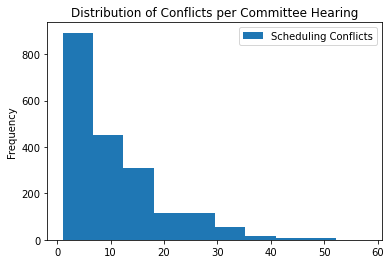

In [7]:
conflicts_hearing = pd.DataFrame(results["Hearing 1 Link"].append(results["Hearing 2 Link"]).value_counts(),columns=["Scheduling Conflicts"])
conflicts_hearing["Committee"] = [hearing_data[hearing_data["Link"]==link]["Committee"].values[0] for link in conflicts_hearing.index]
conflicts_hearing["Code"] = [hearing_data[hearing_data["Link"]==link]["Code"].values[0] for link in conflicts_hearing.index]
conflicts_hearing.index.rename("Link",inplace=True)

maxhearing = str(conflicts_hearing.reset_index().iloc[0,0])
maxcommittee = conflicts_hearing["Committee"].values[0]
maxcommittee_code = conflicts_hearing["Code"].values[0]
maxhearing_conflicts = results[(results["Hearing 1 Link"]==maxhearing)|(results["Hearing 2 Link"]==maxhearing)]
memberswconflict = len(maxhearing_conflicts.drop_duplicates(subset="MC"))
membersincomm = len(members.loc[str(maxcommittee_code)].dropna())


print("The",maxcommittee,"had the hearing with the single highest number of scheduling conflicts.\n\nLink to hearing:",maxhearing,end="\n\n")
print(memberswconflict,"members at the hearing had a conflict, out of",membersincomm,"total members.",end="\n\n")
print("That's",round(memberswconflict/membersincomm,2),"percent of membership with a conflict")

conflicts_hearing.plot.hist(title="Distribution of Conflicts per Committee Hearing",ylabel="test")
conflicts_hearing.to_csv(str("C:\\Users\\rorey\\OneDrive - Bipartisan Policy Center\\Congress\\Modernization\\Scheduling Conflicts\\NEW\\Results\\"+str(congress)+"\\conflictsperhearing"+str(congress)+".csv"),index=True)

In [8]:
print(round(len(conflicts_hearing)/len(hearing_data),2),"percent of hearings had at least one conflict")

0.82 percent of hearings had at least one conflict


In [9]:
## GET AVERAGE NUMBER OF MEMBERS WITH CONFLICTS PER HEARING

membership = [len(members.loc[str(com)].dropna()) for com in members.index]
membership = pd.DataFrame(membership,index=members.index)

conflicts_hearing.reset_index(inplace=True)
averageconflicts = conflicts_hearing
averageconflicts.index = conflicts_hearing["Code"]
averageconflicts.drop(["Code"],axis=1,inplace=True)
averageconflicts = averageconflicts.join(membership,how='left')

averageconflicts = averageconflicts.rename(columns={0:"NumMembers"})

averageconflicts["Percent_Conflict"] = averageconflicts["Scheduling Conflicts"]/averageconflicts["NumMembers"]

print("Average Members in Each Hearing with a Conflict [excluding hearings with no conflicts]")
averageconflicts["Percent_Conflict"].mean()

Average Members in Each Hearing with a Conflict [excluding hearings with no conflicts]


0.4053813385976048

In [10]:
## MERGING WITH HEARING DATA TO GET PERCENT INCLUDING HEARINGS WITHOUT CONFLICTS

averageconflicts.reset_index(inplace=True)
averageconflicts.set_index("Link",inplace=True)
averageconflicts.drop(["Committee"],inplace=True,axis=1)

hearing_data.set_index("Link",inplace=True)

averageconflicts1 = hearing_data.join(averageconflicts,how="left")

averageconflicts1["Scheduling Conflicts"].fillna(0,inplace=True)
averageconflicts1["Percent_Conflict"].fillna(0,inplace=True)

print("Including hearings with no conflicts, average percent of members with a conflict overall")
print(averageconflicts1["Percent_Conflict"].mean())

Including hearings with no conflicts, average percent of members with a conflict overall
0.3335844766237596


# Conflicts by Committee Assignments

<AxesSubplot:title={'center':'Relationship between Committee Assignments and Scheduling Conflicts\n(including subcommittee assignments)'}, xlabel='No. Committees', ylabel='No. Conflicts'>

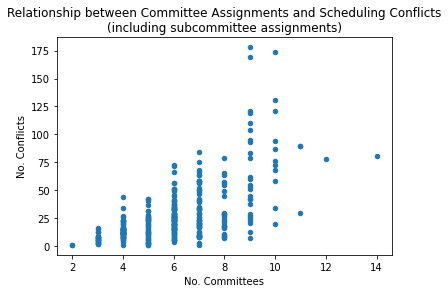

In [11]:
import pandas as pd

member_count = pd.melt(members).drop(["variable"],axis=1)
member_count = member_count[~member_count["value"].isna()]
member_count = pd.DataFrame(pd.value_counts(member_count["value"]))
member_count.columns = ["No. Committees"]

conflict_count = pd.DataFrame(pd.value_counts(results["MC"]))
conflict_by_assignments = pd.merge(member_count,conflict_count,left_index = True,right_index=True)
conflict_by_assignments.columns = ["No. Committees","No. Conflicts"]

conflict_by_assignments.to_csv("C:\\Users\\rorey\\OneDrive - Bipartisan Policy Center\\Congress\\Modernization\\Scheduling Conflicts\\NEW\\Results\\"+str(congress)+"\\conflict_by_assignment"+str(congress)+".csv")
conflict_by_assignments.plot.scatter(x="No. Committees",y="No. Conflicts",title="Relationship between Committee Assignments and Scheduling Conflicts\n(including subcommittee assignments)")

In [12]:
member_count["No. Committees"].mean()

4.526315789473684

In [13]:
# hearing_data[hearing_data["Hearing Title"].str.contains("Mark up",case=False)|hearing_data["Hearing Title"].str.contains("Markup",case=False)]

# Overlap

In [14]:
members.reset_index(inplace=True)
members.drop(["id"],axis=1,inplace=True)
members_long = members[members['index'].str.contains('00')]
members_long = pd.melt(members_long,id_vars=["index"])
members_long.drop(["variable"],axis=1,inplace=True)
members_long.dropna(inplace=True)

In [15]:
hearing_data["ShortCode"] = hearing_data["Code"].str[:-2]
hearing_freq = hearing_data.groupby(["ShortCode"]).count()[["Date"]]
hearing_freq.to_csv("C:\\Users\\rorey\\OneDrive - Bipartisan Policy Center\\Congress\\Modernization\\Scheduling Conflicts\\NEW\\Results\\"+str(congress)+"\\hearingfreq"+str(congress)+".csv",index=True)

In [16]:
comms = members_long["index"].unique()
overlap = pd.DataFrame(columns=comms,index=comms)

for comm in range(len(comms)):
    l1 = list(members_long[members_long['index']==comms[comm]]["value"])
    for comm2 in range(len(comms)):
        l2 = list(members_long[members_long['index']==comms[comm2]]["value"])
#         print(comm,comm2)
        numoverlap = len([value for value in l1 if value in l2])
        overlap.iloc[comm,comm2] = numoverlap

In [17]:
overlap.to_csv("C:\\Users\\rorey\\OneDrive - Bipartisan Policy Center\\Congress\\Modernization\\Scheduling Conflicts\\NEW\\Results\\"+str(congress)+"\\overlap"+str(congress)+".csv",index=True)